# ENPM 808W Homework 2 

### Question 4

Challenge: Build a regressor that best predicts average home values in this dataset.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
cwd = os.getcwd()
data_path = os.path.join(cwd,'Housing_data')

## 1 . Load and view training data

In [21]:
train_data = pd.read_csv(os.path.join(data_path,'house_train.csv'))
train_data.head()

,id,zip,state,county,poverty,price2007,price2013
0,0,10467,NY,bronx,27.1,335200,294000
1,1,11226,NY,kings,21.9,471500,471600
2,2,60640,IL,cook,14.6,254600,174200
3,3,94109,CA,san francisco,10.6,707100,822600
4,4,11375,NY,queens,12.2,636400,681500


## 2. Load and view testing data

In [22]:
test_data = pd.read_csv(os.path.join(data_path,'house_test.csv'))
test_data.head()

,id,zip,state,county,poverty,price2007
0,6,32162,FL,marion,13.0,265600
1,13,78572,TX,hidalgo,34.0,79900
2,20,11212,NY,kings,21.9,332000
3,30,37042,TN,montgomery,12.7,98700
4,37,85032,AZ,maricopa,12.9,266100


## 3 .Size of training and testing data

In [23]:
num_train = train_data.shape[0]
num_test = test_data.shape[0]
print("Number of training examples: {}".format(num_train))
print("Number of testing examples: {}".format(num_test))

Number of training examples: 8973
Number of testing examples: 1063


## 4. Exploratory Data Analysis 

* Exploratory data analsis to get an idea about how the variables are varying with each other. 


In [24]:
train_data.describe()

,id,zip,poverty,price2007,price2013
count,8973.000000,8973.000000,8973.000000,8.973000e+03,8.973000e+03
mean,5016.424830,45752.551098,11.438504,2.880939e+05,2.424867e+05
std,2900.023449,31306.650907,4.520784,2.276980e+05,2.176485e+05
min,0.000000,1001.000000,-1.000000,3.400000e+04,3.520000e+04
25%,2505.000000,19026.000000,8.400000,1.397000e+05,1.223000e+05
50%,5023.000000,37324.000000,11.100000,2.230000e+05,1.788000e+05
75%,7528.000000,76085.000000,14.500000,3.627000e+05,2.848000e+05
max,10035.000000,99709.000000,34.000000,3.467800e+06,4.709500e+06


### Price2013 vs Poverty

* Scatter plot between Price in 2013 and poverty in that area. It can be seen that the relationshio is not linear.

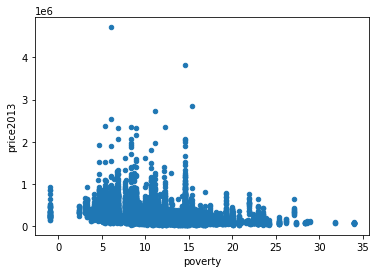

In [25]:
train_data.plot.scatter(x='poverty', y='price2013')

### Price2007 vs Price2013   

* Scatter plot between Price in 2013 and price in 2007. It can be seen that the relationship is linear.

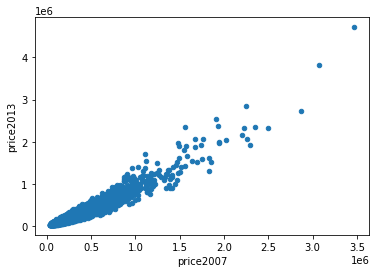

In [26]:
train_data.plot.scatter(x='price2007', y='price2013')

## 5. Obtaining the best model

* To test different models locally, I split the training data set into train and dev in the ratio 80:20
* This was done because I wanted to get an idea about the performance of multiple models locally before uploading to kaggle.
* I tested the performance of the following models -- Using different combination of variables in training such as --   
  i) poverty & price2007,  
  ii) poverty, state, & price2007.  
  iii) Using different transformation function to tranform poverty as the relationship is not linear. I tried using log, reciprocal etc.
* The model with the best performance was when I used the following variables in the training data -- encoded states column, encoded county column, poverty, price2007.
* `Note : The code in this section is for testing only. The code for the final model can be found below` 

In [27]:
training = pd.get_dummies(train_data, columns=['state', 'county'])
#training = train_data
#training['new'] = training['price2007']/(train_data['poverty'])
#training['log_poverty'] = [i for i in training['poverty']]
training = training.drop(columns=['id', 'zip', 'poverty'], axis=1)
#training = training.dropna()
train, dev = train_test_split(training, test_size=0.2, random_state=26, shuffle=True)
training.head()

,price2007,price2013,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,county_yadkin,county_yakima,county_yamhill,county_yates,county_yavapai,county_yellowstone,county_yolo,county_york,county_yuba,county_yuma
0,335200,294000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,471500,471600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254600,174200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,707100,822600,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,636400,681500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Fit model and calculate Error

In [28]:
train_y = train['price2013']
train_x = train.drop(columns=['price2013'], axis=1)
dev_y = dev['price2013']
dev_x = dev.drop(columns=['price2013'], axis=1)


In [29]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [30]:
prediction = model.predict(dev_x)
mean_squared_error(dev_y, prediction, squared=False)

45760.34960295131

## 6.  Final Model

In [31]:
train_data = pd.read_csv(os.path.join(data_path,'house_train.csv'))
test_data = pd.read_csv(os.path.join(data_path,'house_test.csv'))

### One hot encoding the states column

* I have concatenated the train and test data into one to ensure that the encoding is uniform. 
* drop the following columns from the dataset - id, zip, county

In [32]:
dataset = pd.concat(objs=[train_data,  test_data], axis=0)
dataset = dataset.drop(columns=['id', 'zip'], axis=1)
encoded_states = pd.get_dummies(data=dataset, columns=['state', 'county'])
encoded_states.head()

,poverty,price2007,price2013,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,...,county_yadkin,county_yakima,county_yamhill,county_yates,county_yavapai,county_yellowstone,county_yolo,county_york,county_yuba,county_yuma
0,27.1,335200,294000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21.9,471500,471600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6,254600,174200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.6,707100,822600.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.2,636400,681500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training and testing data

In [33]:
train = encoded_states[:int(num_train)]
test = encoded_states[int(num_train):]

train_y = train['price2013']
train_x = train.drop(columns=['price2013'], axis=1)

test_y = test['price2013']
test_x = test.drop(columns=['price2013'], axis=1)


### Train the model


In [34]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

### Prediction

In [35]:
prediction = model.predict(test_x)
prediction = [int(round(i)) for i in prediction]

In [36]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['prediction'] = prediction
submission.to_csv('final.csv', index=False)